# Clustering

Until now we have exclusively looked at supervised methods: to create a model we always had a dataset containing features and a **target** to predict. The goal in those methods was then to be able to do a **prediction** i.e. given a set of new features, predict a variable (continuous like in regression or categorical like in classification). In clustering, **we don't have the target** in our dataset. We rather try to identify sub-groups or clusters in our dataset. In scikit-learn terms, when we use supervised learning we always have features ```X``` and targets ```y``` and when we do clustering, we only have the features ```X```.

## Clustering methods

There are many algorithms to do clustering, but generally the idea is to find sub-groups in our dataset where data points are close together according to some metric. We'll fist look at some artificial data to get the idea. For this we use a scikit-learn function that creates blobs of data:

In [6]:
from sklearn.datasets import make_blobs
import pandas as pd

In [49]:
blobs, labels = make_blobs(n_samples=30, n_features=2, centers=3, random_state=42)

blobs = pd.DataFrame(blobs, columns={'feature1', 'feature2'})
blobs['label'] = labels

blobs.head(5)

,feature1,feature2,label
0,-2.978672,9.556846,0
1,3.161357,1.253325,1
2,3.488885,2.348868,1
3,4.038172,3.825448,1
4,-1.043549,8.788510,0


We generated here a dataframe containing two features and a label. Again, in a real case, **we would not have those labels when performing clusterin**. We only use them here as a control. We can plot these data in a scatterplot as they are 2D:

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

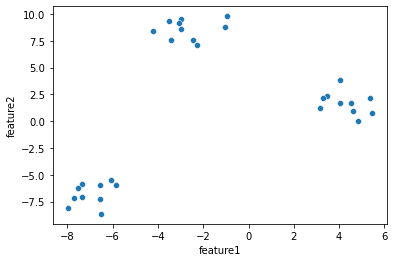

In [51]:
sns.scatterplot(data=blobs, x='feature1', y='feature2')

## K-means clustering

By eye we clearly see that we have three blobs. Now we can use one of the clustering methods to actually let the computer discover those blobs. We look here first at K-means clustering as it is easy to understand. For this method, one uses the following procedure:
1. decide in advance how many clusters are supposed to exist in the dataset, in this case 3. 
2. Randomly place three cluster centers (we do it manually here):

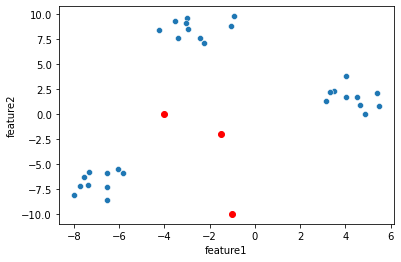

In [81]:
cluster_centers = np.array([[-1, -10], [-4, 0], [-1.5,-2]])

sns.scatterplot(data=blobs, x='feature1', y='feature2')
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro')

3. We compute the distance of each of our data points with the three cluster centers and assign the points to the closest one. Below you can see for each point it's distance to the three cluster.

In [82]:
distances = np.stack([np.linalg.norm(blobs[['feature1', 'feature2']].values - cluster_centers[i], axis=1) for i in range(3)], axis=1)
distances

array([[19.6566878 ,  9.61126525, 11.65105851],
       [11.99809256,  7.27020334,  5.68439744],
       [13.13943014,  7.84860382,  6.61827972],
       [14.71482885,  8.90203708,  8.03786007],
       [18.7885603 ,  9.27245967, 10.79816151],
       [19.49237889,  9.34077047, 11.50757449],
       [13.71761979,  9.62041609,  8.0304938 ],
       [ 7.5925231 ,  6.71301412,  6.9802535 ],
       [17.14789455,  7.30936098,  9.13328846],
       [ 5.69986291,  9.0075179 ,  8.33623562],
       [12.91333604,  8.68667435,  7.05516991],
       [ 6.19219153,  7.70154622,  7.29936728],
       [12.72206042,  8.21320543,  6.65104852],
       [11.59646332,  8.84875273,  6.66038369],
       [19.23514494,  9.17415633, 11.23315988],
       [12.91124887,  7.62691849,  6.36722431],
       [ 6.31832042,  6.22944591,  5.87399496],
       [17.64851993,  7.74786941,  9.63566185],
       [17.76718172,  7.62428799,  9.79151702],
       [ 7.5440657 ,  7.20710054,  7.40954189],
       [ 7.2830478 ,  8.09420511,  8.099

and here we compute in which of the thre column we find the minimum distance:

In [83]:
min_dist = np.argmin(distances, axis=1)
min_dist

array([1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0,
       2, 2, 2, 1, 0, 1, 1, 2])

So now we can assign these labels to our data:

In [84]:
blobs['cluster_label'] = min_dist

On the left we have the actual labels and on the right the ones obtained by clustering:

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

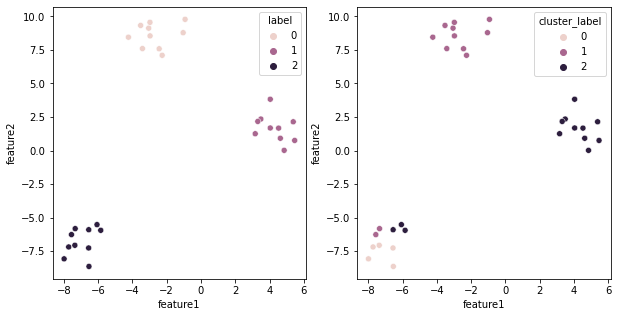

In [85]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='label', ax=ax[0])
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='cluster_label', ax=ax[1])

4. We see that in the lower left cluster, some points are mis-assigned. Now we compute the mean position of the clusters and use that now as our ```cluster_centers```:

In [86]:
cluster_centers = np.stack([blobs[blobs.cluster_label == i][['feature1', 'feature2']].mean().values for i in range(3)], axis=0)

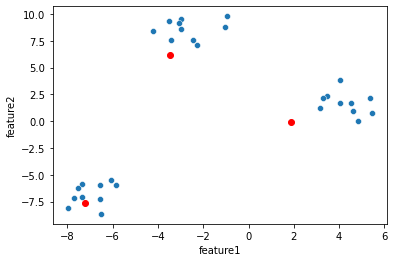

In [87]:
sns.scatterplot(data=blobs, x='feature1', y='feature2')
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro')

5. Because of the mis-assigned points, the cluster centers are not really in the middle of the clusters but they moved in the right direction. Now we can repeat the same operation as before: we assign points to the closest cluster center and update the center positions

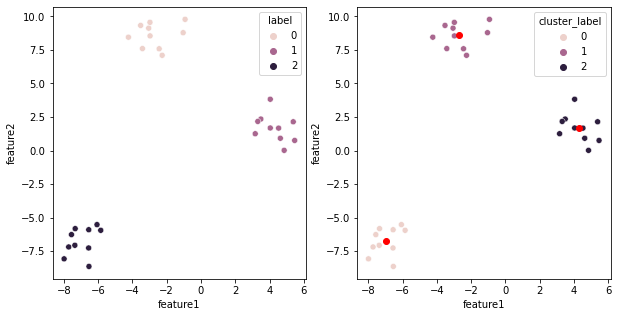

In [101]:
distances = np.stack([np.linalg.norm(blobs[['feature1', 'feature2']].values - cluster_centers[i], axis=1) for i in range(3)], axis=1)
min_dist = np.argmin(distances, axis=1)
blobs['cluster_label'] = min_dist
cluster_centers = np.stack([blobs[blobs.cluster_label == i][['feature1', 'feature2']].mean().values for i in range(3)], axis=0)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='label', ax=ax[0])
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue='cluster_label', ax=ax[1])
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro')

Now already at the second iteration, we have detected the clusters. Usually of course multiple rounds are needed as generally data are not as clean as these blobs used above. You can already see here potential problems with the method: for example if your initial random positions are far from one cluster, it can be ignored and we end up with only two labels. Each method has such limitations.

## Application in scikit-learn

Above we did all the steps manually, but of course the algorithm is implemented in scikit-learn so that you can use it out of the box. Again here, the way to use the method is similar to what we have seen before. First we import the method:

In [102]:
from sklearn.cluster import KMeans

Then we instantiate our model with the required parameters. Here we specify the number of cluster that we expect:

In [103]:
kmeans_model = KMeans(n_clusters=3)

Then we fit our model. Note that in this case, as we don't have a target, we only need the features variable ```X```:

In [109]:
X = blobs[['feature1', 'feature2']]

In [110]:
kmeans_model.fit(X)

KMeans(n_clusters=3)

From our model we can already recover the labels that have been detected:

In [111]:
kmeans_model.cluster_centers_

array([[-6.95160684, -6.77084326],
       [ 4.2879471 ,  1.67770362],
       [-2.6860672 ,  8.58739003]])

In [112]:
kmeans_model.labels_

array([2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 0], dtype=int32)

Let's see if they correspond to our expectations:

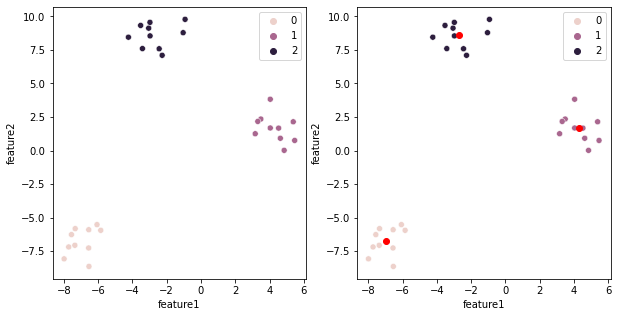

In [113]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue=kmeans_model.labels_, ax=ax[0])
sns.scatterplot(data=blobs, x='feature1', y='feature2', hue=kmeans_model.labels_, ax=ax[1])
plt.plot(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], 'ro')

### Comparing with real labels

In real life, we use clustering because we don't actually have labels for our data. When we test a method as we do above, we have labels and can check e.g. that the algorithm does what we expect. Note however that it can be tricky now to estimate the quality of the result, as the order in which labels are assigned to clusters doesn't necessarily correspond to our "real" labels: e.g. the cluster #1 might be labeled #2. One could check the "real" labels surrounding our predicted cluster centers and take a majority vote. In the example above this would work, however if the clustering is not so clear cut (outliers, touching clusters etc.) this might be tricky to do.

In [ ]:
## Real case

Let's look now at a real dataset that we used previously. 

In [120]:
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    sep='\t', on_bad_lines='skip', names=['area', 'perimeter', 'compactness', 'length', 'width', 'symmetry_coef', 'length_groove', 'seed_type']
)

<AxesSubplot:xlabel='length_groove', ylabel='area'>

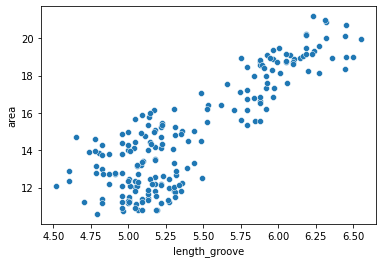

In [124]:
sns.scatterplot(data=seeds, x='length_groove', y='area')#, hue='seed_type')

We know that we have three seed types so we can run the Kmeans model using 3 clusters:

In [125]:
X = seeds[['length_groove', 'area']]

kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X=X)

KMeans(n_clusters=3)

Let's check the prediction and compare it to the actual categories:

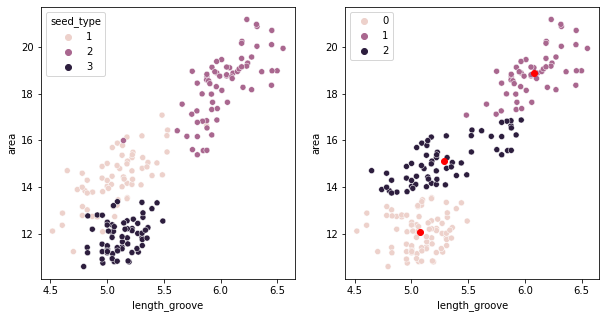

In [127]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=seeds, x='length_groove', y='area', hue='seed_type', ax=ax[0])
sns.scatterplot(data=seeds, x='length_groove', y='area', hue=kmeans_model.labels_, ax=ax[1])
plt.plot(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], 'ro');

We see that most of the points were assigned to a correct cluster, but there are some differences especially between seed types 1 and 2.

## Feature scaling

We have already seen in the case of SVMs that it can be a problem to have features with different magnitudes. In the case of K-means clustering the reason is particularly evident: as we measure distances between points, if one feature has a much larger scale, then it will dominate the clustering, i.e. the data will mainly be partitioned along one given axis as is the case here with the ```area```. We can now check whether scaling our feature in the above case, could help obtain a better clustering. Again we use the ```preprocessing``` module:

In [128]:
from sklearn.preprocessing import StandardScaler

In [130]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

In [131]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X=X_scaled)

KMeans(n_clusters=3)

In [134]:
std_scaler.inverse_transform(kmeans_model.cluster_centers_)

array([[ 5.04823457, 12.09160494],
       [ 6.04355224, 18.40895522],
       [ 5.19382353, 14.82372549]])

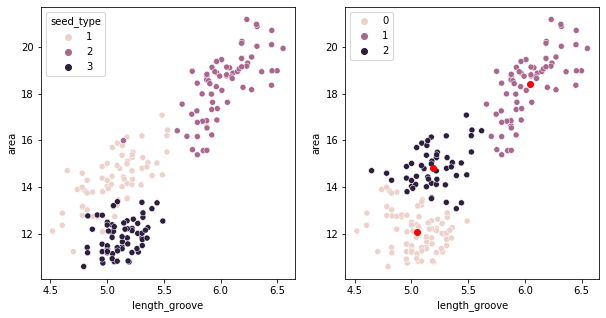

In [135]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=seeds, x='length_groove', y='area', hue='seed_type', ax=ax[0])
sns.scatterplot(data=seeds, x='length_groove', y='area', hue=kmeans_model.labels_, ax=ax[1]);
plt.plot(std_scaler.inverse_transform(kmeans_model.cluster_centers_)[:,0], std_scaler.inverse_transform(kmeans_model.cluster_centers_)[:,1], 'ro');

We see that the scaling indeed helped, especially for the the difference between type 1 and 2.

## Other methods

As mentioned above, there are many ways to detect clusters in a dataset. Just for the purpose of illustration, we show here an alternative called Mean Shift clustering which is capable of finding clusters in smooth distributions and can determine the number of clusters on its own, i.e. we don't have to provide a ```n_clusters``` argument. Let's try that method on our scaled data:

In [194]:
from sklearn.cluster import MeanShift

In [198]:
ms_model = MeanShift()
ms_model.fit(X=X_scaled)

MeanShift()

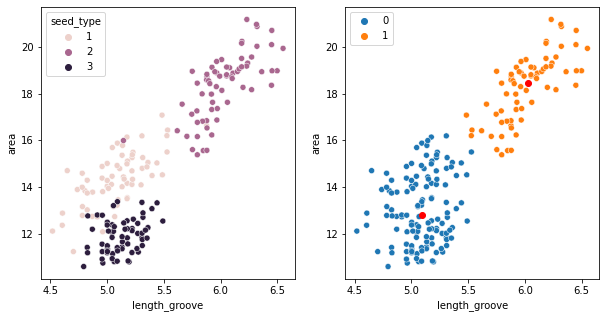

In [200]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=seeds, x='length_groove', y='area', hue='seed_type', ax=ax[0])
sns.scatterplot(data=seeds, x='length_groove', y='area', hue=ms_model.labels_, ax=ax[1]);
plt.plot(std_scaler.inverse_transform(ms_model.cluster_centers_)[:,0], std_scaler.inverse_transform(ms_model.cluster_centers_)[:,1], 'ro');


We see that with the default settings, only two clusters were discovered, categories 1 and 3 being mixed. Most clustering methods have additional parameters that one can specify to improve clustering depending on particular characteristics of a dataset. Mean Shift for example has a bandwith parameters that controls the size of cluster regions. Understanding these parameters of course requires carefully reading documentation and sometimes publications. Let's try to adapt this parameter here:

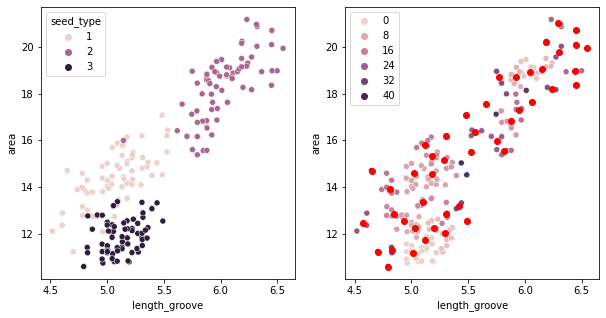

In [203]:
ms_model = MeanShift(bandwidth=0.2)
ms_model.fit(X=X_scaled)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=seeds, x='length_groove', y='area', hue='seed_type', ax=ax[0])
sns.scatterplot(data=seeds, x='length_groove', y='area', hue=ms_model.labels_, ax=ax[1]);
plt.plot(std_scaler.inverse_transform(ms_model.cluster_centers_)[:,0], std_scaler.inverse_transform(ms_model.cluster_centers_)[:,1], 'ro');


Here we used a search region that is too small, and we end up with a large number of tiny clusters. Let's try to adjust more:

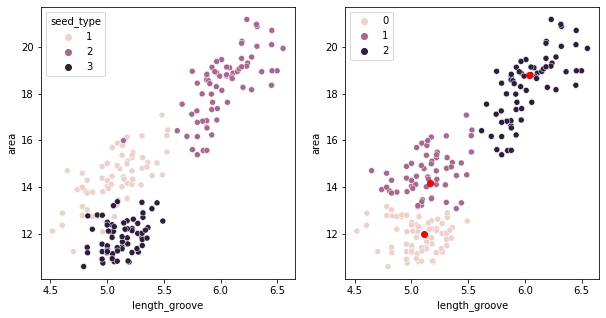

In [205]:
ms_model = MeanShift(bandwidth=0.65)
ms_model.fit(X=X_scaled)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=seeds, x='length_groove', y='area', hue='seed_type', ax=ax[0])
sns.scatterplot(data=seeds, x='length_groove', y='area', hue=ms_model.labels_, ax=ax[1]);
plt.plot(std_scaler.inverse_transform(ms_model.cluster_centers_)[:,0], std_scaler.inverse_transform(ms_model.cluster_centers_)[:,1], 'ro');


Now we found the ideal parameters for our clustering. Obviously in the real world where we don't have the lables available, we can't do this fine tuning and rely on automated methods to for example here set the number of clusters.

## Exercise



1. Import the wine dataset from here: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv Don't forget that this table is separated by ```;``` and you need to specify it in the ```read_csv``` function.

2. In order to create well defined groups, keep only extreme values with ```grade``` <5 or ```grade```>6. Create a new column called ```good_bad``` indicating very low or very high grades

3. Using KMeans, cluster the data with the features ```alcohol``` and ```volatile acidity```

4. Plot the result, and compare the true label and the one from clustering. Is it good? What could you do to improve the result  ?